In [100]:
import numpy as np
from scipy.stats import gamma, norm
import matplotlib.pyplot as plt

In [1]:
# Chosen parameters for assignment
TRUE_ALPHA = 3
TRUE_BETA = 6

In [ ]:
# Re-parameterize for scipy's implementation
a = TRUE_ALPHA
b = 1/TRUE_BETA

# Plot pdf
fig, ax = plt.subplots(1,1)
x = np.linspace(gamma.ppf(0.01, a, scale=b),
                gamma.ppf(0.99, a, scale=b), 100)
ax.plot(x, gamma.pdf(x,a, scale=b),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')

In [120]:
# Helper functions
def plot_dens(ax, a, b, color='r-'):
    x = np.linspace(gamma.ppf(0.01, a, scale=b),
                        gamma.ppf(0.99, a, scale=b), 100)
    ax.plot(x, gamma.pdf(x,a, scale=b),
               color, lw=5, alpha=0.6)
    
def plot_normal_dens(ax, a, color='r-'):
    x = np.linspace(norm.ppf(0.01),
                        norm.ppf(0.99), 100)
    ax.plot(x+a, norm.pdf(x),
               color, lw=5, alpha=0.6)
    
def get_param_ests(y):
    y_bar = y.mean()
    samp_var = (((y-y_bar)**2).sum()/(y.shape[0]-1))
    alpha_hat = (y_bar**2)/samp_var
    beta_hat = y_bar/samp_var
    return alpha_hat, beta_hat

def plot_samples(num_samples_lst, a, b, plot_scale=2):
    plt.clf() # Clear previous figure
    
    # Create the subplots
    fig, axs_tup = plt.subplots(len(num_samples_lst),1)
    width, height = fig.get_size_inches()
    fig.set_size_inches(width*plot_scale,len(num_samples_lst)*height*plot_scale)
    alpha_hats, beta_hats = [], []
    # Sample and plot for each value in list
    for i, num_samples in enumerate(num_samples_lst):
        if len(num_samples_lst) > 1:
            ax = axs_tup[i]
        else:
            ax = axs_tup
                
        y = gamma.rvs(a, size=num_samples, scale=b)
        bin_counts, vals, _ = ax.hist(y, bins=100, density=True)
        
        alpha_hat, beta_hat = get_param_ests(y)
        alpha_hats.append(alpha_hat)
        beta_hats.append(beta_hat)
        ax.set_title("Num Samples: "+str(num_samples_lst[i]))

        print(f"sample size: {num_samples:4d} alpha_hat: {alpha_hat:.3f} true alpha: {TRUE_ALPHA}, "
              +f"beta_hat: {beta_hat:.3f}, true beta: {TRUE_BETA}")
        plot_dens(ax, a, b)
        plot_dens(ax, alpha_hat, 1/beta_hat, color='b')
        ax.set_xlim(0,5)
        
    return alpha_hats, beta_hats
        


sample size:   50 alpha_hat: 2.458 true alpha: 3, beta_hat: 5.238, true beta: 6


<Figure size 432x288 with 0 Axes>

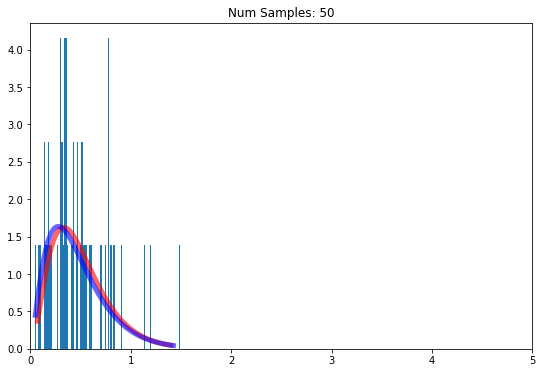

In [88]:
# Experiment settings
num_samples_lst = [50]
plot_scale = 1.5

# Make plots
alpha_hats, beta_hats = plot_samples(num_samples_lst, a, b, plot_scale=plot_scale)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

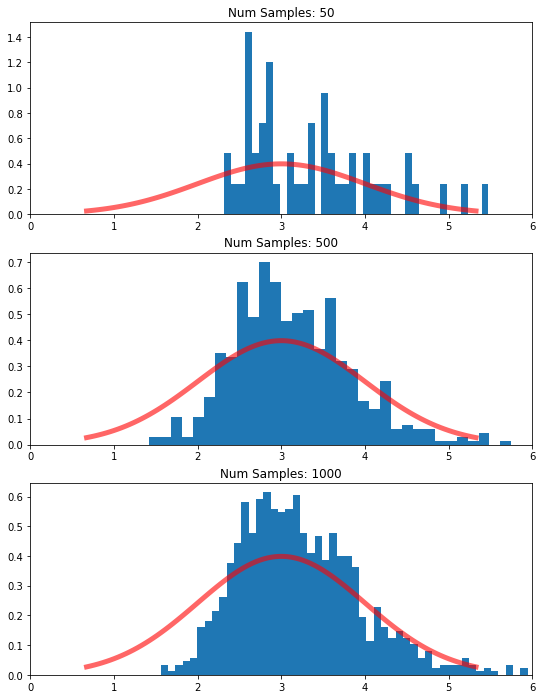

In [125]:
# Experiment settings
B= [50,500, 1000]
num_samples = 50

# Run samplings
alpha_hats, beta_hats = [], []
fig, axs_tup = plt.subplots(len(B),1)
width, height = fig.get_size_inches()
fig.set_size_inches(width*plot_scale,len(B)*height)
for i, b in enumerate(B):
    if len(B) > 1:
        ax = axs_tup[i]
    else:
        ax = axs_tup
    alpha_hats = []
    for i in range(b):
        y = gamma.rvs(a, size=num_samples, scale=b)
        alpha_hat, beta_hat = get_param_ests(y)
        alpha_hats.append(alpha_hat)
    ax.hist(alpha_hats, bins=50, density=True)
    # TRUE_ALPHA shifts the normal distribution
    plot_normal_dens(ax, TRUE_ALPHA)
    ax.set_xlim(a-3, a+3)
    ax.set_title("Num Samples: "+str(b))

plt.show